In [259]:
from math import sin, cos, pi

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [260]:
def imshow(image: np.ndarray, title: str = "") -> None:
    plt.suptitle(title)

    plt.axis(False)

    plt.imshow(image)

    plt.show()

# Are affine transforms easily commutative

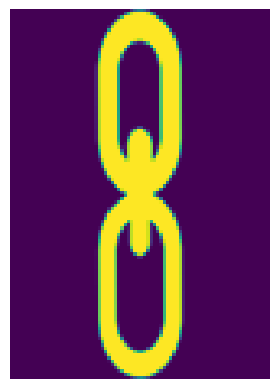

In [261]:
image = np.asarray(
    Image.open(
        "/home/ediun/git/histalign/src/histalign/resources/icons/link-vertical-icon.png"
    ).resize((80, 114))
)[..., 3]

imshow(image)

In [262]:
translation = (10, 10)
scaling = (2, 2)
rotation = 0
shearing = (0, 0)

T = np.array([[1, 0, translation[0]], [0, 1, translation[1]], [0, 0, 1]])
S = np.array([[scaling[0], 0, 0], [0, scaling[1], 0], [0, 0, 1]])
R = np.array(
    [[cos(rotation), -sin(rotation), 0], [sin(rotation), cos(rotation), 0], [0, 0, 1]]
)
H = np.array([[1, shearing[0], 0], [shearing[1], 1, 0], [0, 0, 1]])

In [263]:
# imshow(cv2.warpAffine(image, (T @ S)[:2], image.shape), "T @ S")
# imshow(cv2.warpAffine(image, (S @ T)[:2], image.shape), "S @ T")
# imshow(cv2.warpAffine(image, (H @ S)[:2], image.shape), "H @ S")
# imshow(cv2.warpAffine(image, (S @ H)[:2], image.shape), "S @ H")
# imshow(cv2.warpAffine(image, (H @ T @ R @ S)[:2], image.shape), "H @ T @ R @ S")
# imshow(cv2.warpAffine(image, (H @ T @ R)[:2], image.shape), "H @ T @ R @ S")

# Warping contours

In [264]:
contours = list(cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[0])

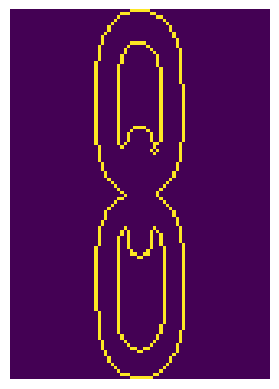

In [265]:
output_image = np.zeros_like(image)

cv2.drawContours(output_image, contours, -1, (255, 255, 255))

imshow(output_image)

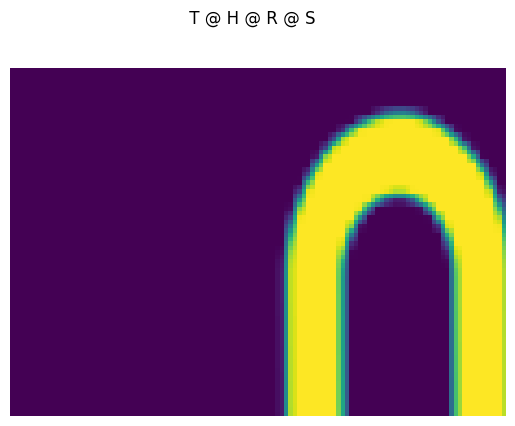

In [266]:
transformation = T @ H @ R @ S

warped = cv2.warpAffine(image, transformation[:2], image.shape)

imshow(warped, " T @ H @ R @ S")

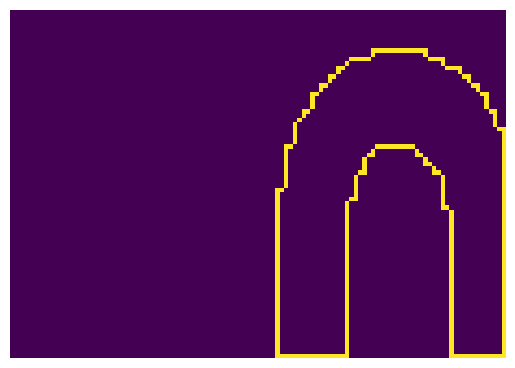

In [267]:
output_image = np.zeros_like(warped)

cv2.drawContours(
    output_image,
    cv2.findContours(warped, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[0],
    -1,
    (255, 255, 255),
)

imshow(output_image)

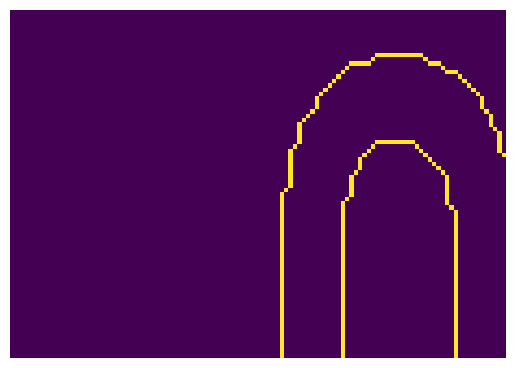

In [268]:
output_image = np.zeros_like(warped)

warped_contours = []
for contour in contours:
    warped_contour = (
        transformation
        @ np.hstack(
            [contour.squeeze(), np.array([1] * contour.shape[0]).reshape(-1, 1)]
        ).T
    )

    warped_contour = warped_contour[:2].T.reshape(-1, 1, 2)

    warped_contour = np.round(warped_contour).astype(np.int32)

    warped_contours.append(warped_contour)

cv2.drawContours(output_image, warped_contours, -1, (255, 255, 255), 1)

imshow(output_image)

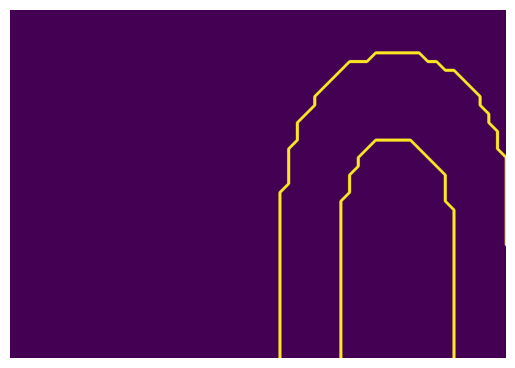

In [271]:
scaling = 10

output_image = np.zeros(np.array(warped.shape) * scaling, dtype=warped.dtype)

warped_contours = []
for contour in contours:
    warped_contour = (
        np.array([[scaling, 0, 0], [0, scaling, 0], [0, 0, 1]])
        @ transformation
        @ np.hstack(
            [contour.squeeze(), np.array([1] * contour.shape[0]).reshape(-1, 1)]
        ).T
    )

    warped_contour = warped_contour[:2].T.reshape(-1, 1, 2)

    warped_contour = np.round(warped_contour).astype(np.int32)

    warped_contours.append(warped_contour)

cv2.drawContours(output_image, warped_contours, -1, (255, 255, 255), 5)

imshow(output_image)